
# Лабораторная 4

## Вариант 6

Теперь система замкнутая. Теоретического решения в лекции не дано. Придется самому решать уравнение Колмогорова, занулять производные.

Однофазная многоканальная СМО с неограниченной очередью $M/M/n/\infty$.

In [15]:
Variant<-6
set.seed(Variant) 
k<-sample(c(10:25),1)
m<-sample(c(3:6),1)
t1<-sample(c(14:20),1)
t2<-sample(c(2:5),1)
View(data.frame(k,m,t1,t2))

k  m t1 t2
1 14 4 18 3

In [16]:
# Попытка сделать через queueing
# доки адекватной нет
# вроде замкнутые системы не считает, но это не точно

# Внятное описание интерфейсов
# https://github.com/rsalaza4/R-for-Industrial-Engineering/blob/master/Modeling%20and%20Simulation/Queueing%20Models/R%20Code/Queueing%20Models.R

# Тупой список функций пакета
# https://www.rdocumentation.org/packages/queueing/versions/0.2.12

# install.packages('queueing')
# library('queueing')

In [17]:
# input_MMCK <- NewInput.MMCK(lambda = 1/t1, mu = t2, c = m, k = k-m)
# output_MMCK <- QueueingModel(input_MMCK)
# Report(output_MMCK)
# summary(output_MMCK)

# curve(dexp(x, rate = 1/input_MMCK$lambda),
#       from = 0, 
#       to = 10,
#       type = "l", 
#       lwd = 2,
#       xlab = "Interarrival Time",
#       ylab = "Probaility",
#       main = "Exponential Distribution for Interarrival Time",
#       ylim = c(0, 1))
# abline(h = 0)

## Теоретическое решение

Обозначу как в лекции.

интенсивность нагрузки - $y$ -  $\rho$ (везде, кроме лекции)

кол-во каналов - $n$ - $m$ (в задании к лабораторной)

## Граф состояний

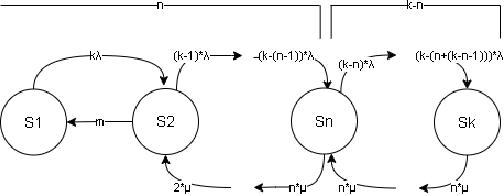

Полученный граф состояний соответствует схеме размножения гибели с бесконечным количеством состояний. Естественное условие существования финальных вероятностей  - это $\frac{y}{n}<1$.

Формула разможения гибели:
$$P_0=\left(1+\sum_{k=1}^n\frac{\prod_{i=1}^k\lambda_i}{\prod_{i=1}^k \mu_i}\right)^{-1}\tag{25}$$

Применяя формулы размножения гибели, найдем финальные вероятности.
Обозначим $y=\frac{\lambda}{\mu}$, получим:


$$P_0=(1+\frac{ky}{1!}+\frac{k(k-1)y^2}{2!}+\frac{k(k-1)(k-2)y^3}{3!}+\ldots+\frac{k(k-1)\cdots(k-(n-1))*y^n}{n!}+\frac{k(k-1)\cdots(k-n)y^ny}{n!n}+$$

$$+\frac{k(k-1)\cdots(k-(n+1))y^ny^2}{n!n^2}+\ldots+\frac{k!y^k}{n!n^{k-n}})^{-1}$$

$$P_0=\left(\sum_{i=0}^n\frac{k!y^i}{(k-i)!i!}+\sum_{i=n+1}^k\frac{k!y^{i}}{n! n^{i-n}(k-i)!}\right)^{-1}$$

Воспользуемся данной формулой процесса размножения гибели:
$$P_k=\frac{\prod_{i=1}^k \lambda_i}{\prod_{i=1}^k \mu_i}\cdot P_0\tag{24}$$
Получаем
$$P_1=\frac{ky}{1!}\cdot P_0, P_2=\frac{k(k-1)y^2}{2!}\cdot P_0, \ldots$$

$$ P_{i}|_{i\leq n} = \frac{k!y^i}{(k-i)!i!}\cdot P_0\tag{13}, \quad i\leq n $$

$$ P_{i}|_{n\lt i \leq k}=\frac{k!y^i}{(k-i)!n!n^{i-n}}\cdot P_0\tag{14}, \quad  n\lt i \leq k$$



In [18]:
lambda <- 1/t1
mu <- 1/t2
y <- lambda/mu
n <- m

lambda; mu; y

p0 <- 1/factorial(k)/(
  sum(vapply(
    c(0:n),
    function(i) (y^i)/factorial(k-i)/factorial(i),  
    double(1)
  )) + sum(vapply(
    c((n+1):k),
    function(i) (y^i)/factorial(n)/(n^(i-n))/factorial(k-i),  
    double(1)
  ))
); p0

pi <- vapply(
  c(1:k),
  function(i) {
    if (i <= n) {
      return( factorial(k)*(y^i)/factorial(k-i)/factorial(i)*p0 )
    }
    return( factorial(k)*(y^i)/factorial(k-i)/factorial(n)/(n^(i-n))*p0 )
  },  
  double(1)
); pi;

[1] 0.05555556

[1] 0.3333333

[1] 0.1666667

[1] 0.1134198

[1] 2.646462e-01 2.867001e-01 1.911334e-01 8.760281e-02 3.650117e-02
 [6] 1.368794e-02 4.562646e-03 1.330772e-03 3.326929e-04 6.931103e-05
[11] 1.155184e-05 1.443980e-06 1.203317e-07 5.013819e-09

In [19]:
# проверка
sum(pi) + p0

[1] 1

Найдем основные характеристики эффективности СМО. 

**Вероятность образования очереди**:
$$P_{\text{оч}}=\sum_{i=n+1}^k P_i = P_0\sum_{i=n}^k\frac{k!y^{i}}{n! n^{i-n}(k-i)!} = 1-\sum_{i=0}^{n} P_i$$

Вероятность отказа
$$P_{отк} = 0 $$

---

Среднее число занятых серверов (среднее число программ, которые выполняются)
$$L_{об}=\sum_{i=0}^{n-1}i P_i + n \sum_{i=n}^i P_i = \sum_{i=0}^{n-1}i P_i + n(1 - \sum_{i=0}^{n-1} P_i)$$
или 
$$L_{об} = n - \sum_{i=0}^{n-1} (n-i) P_i$$

Среднее число программ, находящихся в системе
$$L_{сист} = \sum_{i=1}^k i P_i$$

**Среднее число заявок в очереди**:
$$L_{оч} = L_{сист} - L_{об} = L_{оч} = \sum_{i=n+1}^k (i-n) P_i $$

---

Интенсивность потока
$$\Lambda = (k-L_{сист}) \lambda $$

**Среднее время в системе**
$$T_{сист} = L_{сист} / \Lambda $$

In [20]:
# вероятность того, что программа не будет выполнена сразу же, как только она 
# поступила на терминал
# sum(pi[(n+1):k])
1-p0-sum(pi[1:n])

# среднее время до получения пользователем результатов реализации
Lsist <- sum(vapply(
  c(1:k),
  function(i) i*pi[i],
  double(1)
))

Lob <- n - sum(vapply(
  c(0:(n-1)),
  function(i) {if (i == 0) {return(n*p0)} else {return((n-i)*pi[i])}},
  double(1)
))

Lsist/(k-Lsist)/lambda


# среднее количество программ, ожидающих выполнения на сервере.
Lsist - Lob

# сравнительная таблица
table = data.frame(c(1-p0-sum(pi[1:n]), Lsist/(k-Lsist)/lambda, Lsist - Lob))
rownames(table) <- c("1", "2", "3")

[1] 0.05649765

[1] 3.128371

[1] 0.08506095

## Экспериментальное решение

In [21]:

experiment <- function(k_local, m_local, t1_local, t2_local, N, DEBUG=F) {
  lambda1 = 1/t1_local
  lambda2 = 1/t2_local

  set.seed(Variant)

  # вектор событий (времен с начала моделирования) загрузки программ на сервер
  event_task_send <- vector(mode='double', length=N)

  # event_server_free
  # вектор событий (времен с начала моделирования),
  # когда сервер заканчивает обработку i-й присланной программы

  # event_queue_size
  # вектор размеров очереди, когда приходит i-ая присланная программа. Первый всегда 0

  # event_wait_time
  # вектор времен ожидания завершения i-й присланной программы с учетом
  # ожидания в очереди

  event_server_free <- vector(mode='double', length=length(event_task_send))
  event_queue_size <- vector(mode='integer', length=length(event_task_send))
  event_wait_time <- vector(mode='double', length=length(event_task_send))
  event_queue_decrease_times <- vector(mode='double', length=length(event_task_send))

  time <- 0 # просто, чтобы знать текущее модельное время

  sends_per_programmer <- vector(mode='double', length=k_local)
  states_per_programmer <- vector(mode='logical', length=k_local)
  server_free_timestamps <- rep(0, times=m_local)

  # генерируем первые отправки каждым из k программистов
  sends_per_programmer <- rexp(k_local, lambda1)

  for (i in 1:N) {
    # выбор текущей обрабатываемой программы 
    min_send_idx <- which.min(sends_per_programmer)
    min_free_idx <- which.min(server_free_timestamps)
    cur_send_timestamp <- sends_per_programmer[min_send_idx]
    cur_free_timestamp <- server_free_timestamps[min_free_idx]

    if (DEBUG) {
      print(paste(
        'шаг', as.character(i), ':',
        '[ время', as.character(time), ']'
      ))
      print('очередь отправок')
      print(sends_per_programmer)
      print('состояние серверов')
      print(server_free_timestamps)
      print(paste(
        'сравниваю', cur_send_timestamp, cur_free_timestamp
      ))
    }

    if (cur_send_timestamp > cur_free_timestamp) {
      # уходит в обработку на сервер с номером min_free_idx
      # сервер будет занят обработкой этой задачи до Время == new_process_end_timestamp
      new_process_end_timestamp <- cur_send_timestamp + rexp(1, lambda2)
      server_free_timestamps[min_free_idx] <- new_process_end_timestamp
      # после обработки сервером
      # Программист № min_send_idx пишет новую программу до Время == new_process_end_timestamp + rexp(1, lambda1)
      sends_per_programmer[min_send_idx] <- new_process_end_timestamp + rexp(1, lambda1)

      # Статистики 
      event_server_free[i] <- new_process_end_timestamp
      event_wait_time[i] <- new_process_end_timestamp - cur_send_timestamp # ждет только время выполнения т.е. rexp(1, lambda2)

      if (DEBUG) {
        print(paste(
          '> принята заявка', as.character(cur_send_timestamp), as.character(min_send_idx),
          'на сервер', as.character(min_free_idx)
        ))
        print(paste(
          '> закончит обрабатываться в', as.character(new_process_end_timestamp), '|', 'ждал', as.character(event_wait_time[i]) 
        ))
      }

      time <- cur_send_timestamp
    } else {
      # сервера еще не освободились, перематываем на время, когда освободится первый из них. Время = cur_free_timestamp
      # разгребаем очередь. Так же берем наиболее раннюю заявку
      new_process_end_timestamp <- cur_free_timestamp + rexp(1, lambda2)
      server_free_timestamps[min_free_idx] <- new_process_end_timestamp
      sends_per_programmer[min_send_idx] <- new_process_end_timestamp + rexp(1, lambda1)

      # Статистики 
      event_server_free[i] <- new_process_end_timestamp
      event_wait_time[i] <- new_process_end_timestamp - cur_send_timestamp
      event_queue_decrease_times <- append(event_queue_decrease_times, cur_free_timestamp)

      if (DEBUG) {
        print(paste(
          '> заявка', as.character(cur_send_timestamp), as.character(min_send_idx),
          'помещена в очередь на сервер', as.character(min_free_idx)
        ))
        print(paste(
          '> закончит обрабатываться в', as.character(new_process_end_timestamp), '|', 'ждал', as.character(event_wait_time[i]) 
        ))
      }
      time <- cur_free_timestamp
    }

    event_task_send[i] <- cur_send_timestamp
    event_queue_decrease_times <- event_queue_decrease_times[event_queue_decrease_times > cur_send_timestamp]
    event_queue_size[i] <- length(event_queue_decrease_times)

    if (DEBUG) {
      print(paste(
        '> очередь', as.character(), '(', as.character(i), ')'
      ))
      print(event_queue_size[1:i])
    }

    if (DEBUG) {print("===============================================================================")}
  }

  return(list(
    event_task_send = event_task_send,
    event_server_free = event_server_free,
    event_queue_size = event_queue_size,
    event_wait_time = event_wait_time
  ))
}

In [22]:
# Можно посмотреть, как работает подробно
# exp_res_1 = experiment(k, m, t1, t2, 3*k, DEBUG=T)

In [23]:
exp_res_1 = experiment(k, m, t1, t2, 60000*k)

print("1) вектор времен поступления программ на сервер")
print("2) вектор размеров очереди, когда приходит i-ая присланная программа. Первый всегда 0")
print("3) вектор времен ожидания завершения i-й присланной программы с учетом ожидания в очереди")
print("4) вектор времен, когда сервер заканчивает обработку i-й присланной программы")
print(paste0('[', as.character(1), ':', as.character(2*k), "] ==============================================================================="))
exp_res_1$event_task_send[1:(2*k)]
exp_res_1$event_queue_size[1:(2*k)]
exp_res_1$event_wait_time[1:(2*k)]
exp_res_1$event_server_free[1:(2*k)]

print(paste0('[', as.character(52*k+1), ':', as.character(54*k), "] ==============================================================================="))

exp_res_1$event_task_send[(52*k+1):(54*k)]
exp_res_1$event_queue_size[(52*k+1):(54*k)]
exp_res_1$event_wait_time[(52*k+1):(54*k)]
exp_res_1$event_server_free[(52*k+1):(54*k)]

[1] "1) вектор времен поступления программ на сервер"
[1] "2) вектор размеров очереди, когда приходит i-ая присланная программа. Первый всегда 0"
[1] "3) вектор времен ожидания завершения i-й присланной программы с учетом ожидания в очереди"
[1] "4) вектор времен, когда сервер заканчивает обработку i-й присланной программы"
[1] "[1:28] ==============================================================================="


[1]  0.6442461  1.1881835  1.4881998  2.5426312  3.2982280  3.8256587
 [7]  5.1686195  6.3587060  6.4025975  7.2189376  7.3831419  9.7175412
[13] 11.0694020 11.3748839 12.4527017 12.7754961 12.9009831 12.9302994
[19] 14.7929891 16.1037659 17.6409212 20.6921551 21.0954791 22.2698069
[25] 25.4153180 25.5846925 28.1541045 29.7444888

[1] 0 0 0 0 0 0 1 0 1 2 3 0 0 0 0 1 2 3 2 0 0 0 0 0 0 0 0 0

[1] 4.8155658 0.5706020 4.1869424 0.1231509 7.0794208 7.1166992 2.2334751
 [8] 2.5309581 2.1322690 7.8554903 1.7684752 4.1129283 0.1121659 7.9282004
[15] 1.7068327 4.0333799 5.6678350 2.1781980 0.7629789 3.4889288 2.3834060
[22] 0.2620854 0.1312810 9.2630432 0.2656486 0.5086808 4.6312419 9.0822202

[1]  5.459812  1.758785  5.675142  2.665782 10.377649 10.942358  7.402095
 [8]  8.889664  8.534867 15.074428  9.151617 13.830469 11.181568 19.303084
[15] 14.159534 16.808876 18.568818 15.108497 15.555968 19.592695 20.024327
[22] 20.954241 21.226760 31.532850 25.680967 26.093373 32.785346 38.826709

[1] "[729:756] ==============================================================================="


[1] 1029.363 1030.818 1031.881 1037.815 1038.326 1038.480 1038.994 1039.795
 [9] 1040.848 1043.656 1043.852 1043.917 1044.851 1046.377 1047.046 1049.865
[17] 1050.722 1052.619 1052.980 1056.293 1057.254 1060.968 1063.639 1063.920
[25] 1064.299 1067.164 1067.172 1067.993

[1] 0 0 0 0 0 0 0 1 1 0 1 2 3 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0

[1]  0.8516488  0.8809934  5.9880784  7.0704426  1.7187120  3.3140378
 [7]  3.6653111  6.5395728  4.2941620  2.8280085  4.7630452 11.4179460
[13]  2.9574327  1.6997758  2.7643373  0.4994519  0.9890848  2.0139581
[19]  0.2500624  3.5149041  2.6489259  0.9680781  1.3848586  7.0520949
[25]  1.7083014  4.0436491  8.2641797  2.0762365

[1] 1030.215 1031.699 1037.869 1044.885 1040.044 1041.794 1042.659 1046.335
 [9] 1045.142 1046.484 1048.615 1055.335 1047.809 1048.076 1049.811 1050.365
[17] 1051.711 1054.633 1053.230 1059.808 1059.903 1061.936 1065.024 1070.972
[25] 1066.007 1071.207 1075.436 1070.070

Размер очередь не может привысить значение k - m = 14 - 4 = 10

In [24]:
for (i in 1:(k-m)) {
  print(paste(
    'Очередь достигла и превысила', as.character(i), length(exp_res_1$event_queue_size[exp_res_1$event_queue_size >= i]), 'раз'
  ))
}

[1] "Очередь достигла и превысила 1 95200 раз"
[1] "Очередь достигла и превысила 2 33576 раз"
[1] "Очередь достигла и превысила 3 10613 раз"
[1] "Очередь достигла и превысила 4 2886 раз"
[1] "Очередь достигла и превысила 5 696 раз"
[1] "Очередь достигла и превысила 6 127 раз"
[1] "Очередь достигла и превысила 7 24 раз"
[1] "Очередь достигла и превысила 8 6 раз"
[1] "Очередь достигла и превысила 9 0 раз"
[1] "Очередь достигла и превысила 10 0 раз"


## Расчет требуемых статистик

> вероятность того, что программа не будет выполнена сразу же, как только она 
поступила на терминал

Это вероятность того, что размер очереди в момент поступления программы будет не 0
$$ \frac{суммарное \quad время, \quad когда \quad есть \quad очередь}{время \quad симуляции} $$


> среднее время до получения пользователем результатов реализации;

Это среднее из вектора `event_wait_time`. Это
- либо время выполнения программы, если размер очереди 0
- либо время ожидания + время выполнения программы, если размер очереди не 0.

> среднее количество программ, ожидающих выполнения на сервере

Это средний <u>во времени</u> размер очереди
$$ \frac{\sum_i{ \Delta t_{i}Q_{i}} }{время \quad симуляции} $$

In [25]:
simulation_time <- exp_res_1$event_task_send[length(exp_res_1$event_task_send)]

measures_deltas <- c(exp_res_1$event_task_send[1] - 0, vapply(
  c(2:length(exp_res_1$event_task_send)),
  function(i) exp_res_1$event_task_send[i] - exp_res_1$event_task_send[i-1],
  double(1)
))

# вероятность того, что программа не будет выполнена сразу же, как только она 
# поступила на терминал
not_null_queues_idxs <- which(exp_res_1$event_queue_size > 0)
sum(measures_deltas[not_null_queues_idxs]) / simulation_time

# среднее время до получения пользователем результатов реализации
mean(exp_res_1$event_wait_time)

# среднее количество программ, ожидающих выполнения на сервере.
sum(measures_deltas * exp_res_1$event_queue_size) / simulation_time

table<-cbind(table, c(
  sum(measures_deltas[not_null_queues_idxs]) / simulation_time,
  mean(exp_res_1$event_wait_time),
  sum(measures_deltas * exp_res_1$event_queue_size) / simulation_time
))
colnames(table) <- c("Теория", "Эксперимент")
View(table)


[1] 0.05619246

[1] 3.123583

[1] 0.0843587

Теория     Эксперимент
1 0.05649765 0.05619246 
2 3.12837138 3.12358257 
3 0.08506095 0.08435870

## Все то же при m=1

In [26]:
lambda <- 1/t1
mu <- 1/t2
y <- lambda/mu
n <- 1

p0 <- 1/factorial(k)/(
  sum(vapply(
    c(0:n),
    function(i) (y^i)/factorial(k-i)/factorial(i),  
    double(1)
  )) + sum(vapply(
    c((n+1):k),
    function(i) (y^i)/factorial(n)/(n^(i-n))/factorial(k-i),  
    double(1)
  ))
)

pi <- vapply(
  c(1:k),
  function(i) {
    if (i <= n) {
      return( factorial(k)*(y^i)/factorial(k-i)/factorial(i)*p0 )
    }
    return( factorial(k)*(y^i)/factorial(k-i)/factorial(n)/(n^(i-n))*p0 )
  },  
  double(1)
)

# вероятность того, что программа не будет выполнена сразу же, как только она 
# поступила на терминал
sum(pi[(n+1):k])

# среднее время до получения пользователем результатов реализации
Lsist <- sum(vapply(
  c(1:k),
  function(i) i*pi[i],
  double(1)
))

Lob <- n - sum(vapply(
  c(0:(n-1)),
  function(i) {if (i == 0) {return(n*p0)} else {return((n-i)*pi[i])}},
  double(1)
))

Lsist/(k-Lsist)/lambda


# среднее количество программ, ожидающих выполнения на сервере.
Lsist - Lob

# сравнительная таблица
table = data.frame(c(1-p0-sum(pi[1:n]), Lsist/(k-Lsist)/lambda, Lsist - Lob))
rownames(table) <- c("1", "2", "3")

[1] 0.9925625

[1] 24.09392

[1] 7.015619

In [27]:
exp_res_2 = experiment(k, 1, t1, t2, 60000*k)

In [28]:

simulation_time <- exp_res_1$event_task_send[length(exp_res_1$event_task_send)]
measures_deltas <- c(exp_res_1$event_task_send[1] - 0, vapply(
  c(2:length(exp_res_1$event_task_send)),
  function(i) exp_res_1$event_task_send[i] - exp_res_1$event_task_send[i-1],
  double(1)
))
not_null_queues_idxs <- which(exp_res_2$event_queue_size > 0)

table<-cbind(table, c(
  # вероятность того, что программа не будет выполнена сразу же, как только она 
  # поступила на терминал
  sum(measures_deltas[not_null_queues_idxs]) / simulation_time,
  # среднее время до получения пользователем результатов реализации
  mean(exp_res_2$event_wait_time),
  # среднее количество программ, ожидающих выполнения на сервере.
  sum(measures_deltas * exp_res_2$event_queue_size) / simulation_time
))
colnames(table) <- c("Теория", "Эксперимент")
View(table)

Теория     Эксперимент
1  0.9925625  0.9936376 
2 24.0939226 24.0289181 
3  7.0156188  6.8817287